# 4x4 grid of graphs comparing actual depth errors and fractal roughness measures

THKH case

**Chris Field April 2022**

In [1]:
import os  # operating system
import sys # to add src directory for my modules
#
import numpy as np
import math
import random
#
import pandas as pd
from scipy import stats
#
# Plotting requirements
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.font_manager # different fonts
from matplotlib import rcParams # runtime config to set fonts

In [2]:
# Using rcParams set the global fonts for Matplotlib
# Global parameters for Matplotlib: set font etc.
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Gill Sans MT']
rcParams['font.serif'] = ['Garamond']
rcParams['font.size'] = '16'
#

## Define Functions

In [3]:
# Shared variables:
colours = ['#1f77b4', '#ED1D24', '#1CEDAB', '#AC5678', '#896E2E', '#EDDD11', '#05ED42']

# Input Data

In [4]:
location_in = './Input_4/'

location_out='./Output_4/'

location_out_plots='./Pictures/Horizon_analysis_plots/'

# If necessary make output folders
    
if not os.path.exists(location_out_plots) :
    os.makedirs(location_out_plots)

# Load in and prepare data
* Note currently this data is stitched together by hand, should automate its creation.

In [5]:
# Read csv nDI format TBZ (event) ascii
df_input=pd.read_excel(location_in + 'Original_THKH_Seismic_PSD_and_fractal_dimension_analysis_with_fieldstats.xlsx')
# Remove quote marks from column names
df_input.columns=df_input.columns.str.replace('\"','')
# Some column names have trailing white space, remove this
df_input.columns=df_input.columns.str.replace('\s+','_')

In [6]:
# Remove NIMR field
df_input = df_input[df_input['FIELD_NAME'] != 'RABA']

In [7]:
# sort in reverse order of fractal dimention
df_input.sort_values(by='FIELD_NAME', ascending=True)

,Name,PSD_slope,Dpsd,SV_slope,SV_intercept,Dsv,M_slope,M_intercept,Dm,FIELD_NAME,...,AVERAGE_DEPTH_(M),DEPTH_STANDARD_DEVIATION_(M),NUMBER_OUT_OF_PROGNOSIS,%_OUT_OF_PROGNOSIS,AVERAGE_ERROR_(M),ERROR_STANDARD_DEVIATION_(M),ERROR_SKEW,ERROR_KURTOSIS,NUMBER_OF_LEGACY_WELLS,MEDIAN_CLOSEST_WELL_SEPARATION_AT_STRAT_(M)
0,df_al_huwaisah_X,-2.17,1.41,1.60,-1.01,1.20,0.99,-0.87,1.01,AL HUWAISAH,...,1459.76,17.50,3,5.6,0.70,5.00,1.24,3.88,446,340
1,df_al_huwaisah_Y,-2.09,1.45,1.43,-1.17,1.29,0.99,-1.07,1.01,AL HUWAISAH,...,1459.76,17.50,3,5.6,0.70,5.00,1.24,3.88,446,340
2,df_burhaan_X,-2.25,1.38,1.51,0.98,1.24,0.97,-0.21,1.03,BURHAAN,...,1373.34,30.04,0,0.0,-1.02,6.11,-1.63,5.59,208,143
3,df_burhaan_Y,-2.18,1.41,1.69,1.10,1.15,0.99,-0.37,1.01,BURHAAN,...,1373.34,30.04,0,0.0,-1.02,6.11,-1.63,5.59,208,143
4,df_ghaba_north_X,-1.98,1.51,1.67,-0.47,1.17,0.94,-0.55,1.06,GHABA NORTH,...,487.39,23.06,0,0.0,0.74,4.05,0.47,-0.12,56,305
5,df_ghaba_north_Y,-1.96,1.52,1.77,-0.53,1.11,0.97,-0.55,1.03,GHABA NORTH,...,487.39,23.06,0,0.0,0.74,4.05,0.47,-0.12,56,305
6,df_musallim_X,-2.86,1.07,1.61,-1.07,1.19,0.98,-0.98,1.02,MUSALLIM,...,1442.53,14.51,12,12.4,0.63,5.12,1.75,9.19,453,98
7,df_musallim_Y,-2.10,1.45,1.58,-1.09,1.21,1.00,-0.98,1.00,MUSALLIM,...,1442.53,14.51,12,12.4,0.63,5.12,1.75,9.19,453,98
8,df_qarn_alam_X,-2.29,1.36,1.69,0.33,1.16,0.99,-0.53,1.01,QARN ALAM,...,361.65,61.34,3,9.7,-1.32,5.43,1.84,6.15,198,127
9,df_qarn_alam_Y,-2.79,1.10,1.91,-0.01,1.04,0.99,-0.51,1.01,QARN ALAM,...,361.65,61.34,3,9.7,-1.32,5.43,1.84,6.15,198,127


In [8]:
# Double up colours as there are two entries per field
col_doub = []
for col in colours:
   for j in range(2):
        col_doub.append(col) 
    

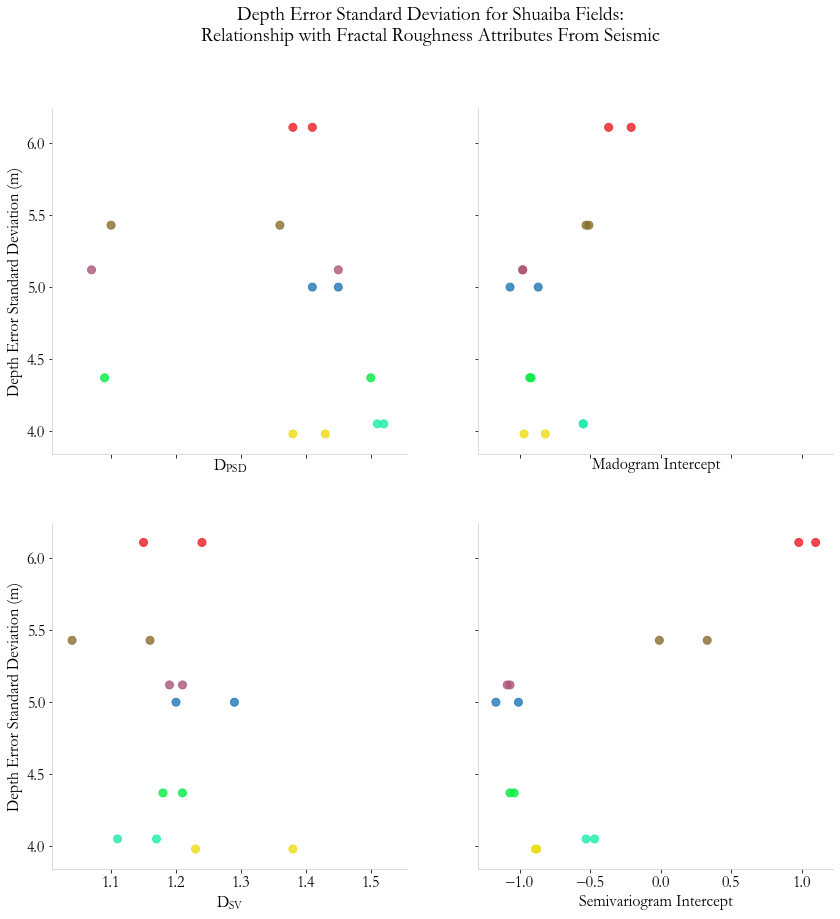

In [9]:
s =64
alpha = 0.8

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14,14))  # 2x2 grid

ax[0, 0].scatter(df_input['Dpsd'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[1, 0].scatter(df_input['Dsv'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[0, 1].scatter(df_input['M_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[1, 1].scatter(df_input['SV_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)



# x axis labels
ax[0, 0].set_xlabel("$\mathregular{D_{PSD}}$")
ax[1, 0].set_xlabel("$\mathregular{D_{SV}}$")
ax[0, 1].set_xlabel("Madogram Intercept")
ax[1, 1].set_xlabel("Semivariogram Intercept")

# y axis labels
ax[0, 0].set_ylabel('Depth Error Standard Deviation (m)')
ax[1, 0].set_ylabel('Depth Error Standard Deviation (m)')



# cosmetics
## Remove axis lines.
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
#         ax[i, j].spines['bottom'].set_visible(False)
#         ax[i, j].spines['left'].set_visible(False)
        
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_color('lightgrey')
        ax[i, j].spines['right'].set_color('lightgrey')
        ax[i, j].spines['bottom'].set_color('lightgrey')
        ax[i, j].spines['left'].set_color('lightgrey')
        


# plt.tight_layout()
fig.suptitle('Depth Error Standard Deviation for Shuaiba Fields:\nRelationship with Fractal Roughness Attributes From Seismic')

plt.show()

fig_name=location_out_plots + '_Depth_error_THKH'  +'.png'
fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight",dpi=1000)

Regressions

In [10]:
# Do a regression for semivariongram intercept
res = stats.linregress(df_input['SV_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'])
print(res)

LinregressResult(slope=0.671701554359588, intercept=5.192928900052313, rvalue=0.7025047978664224, pvalue=0.005083770021608462, stderr=0.19643577781258406)


In [11]:
res.rvalue ** 2

0.49351299102534296

In [12]:
round(res.slope, 2), round(res.intercept, 2)

(0.67, 5.19)